In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\Vikas\jupyter book\ex_files\Train.csv")

In [3]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
df.shape

(8523, 12)

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
p=df.isnull().sum()*100

In [9]:
p/8523

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
for col in df.columns:
    if df[col].dtypes=="object":
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].mean())

In [11]:
p=df.isnull().sum()*100

In [12]:
p

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#                         EDA

# univariate analysis
# Bivariate analysis
# Multivariate analysis
# Time series analysis

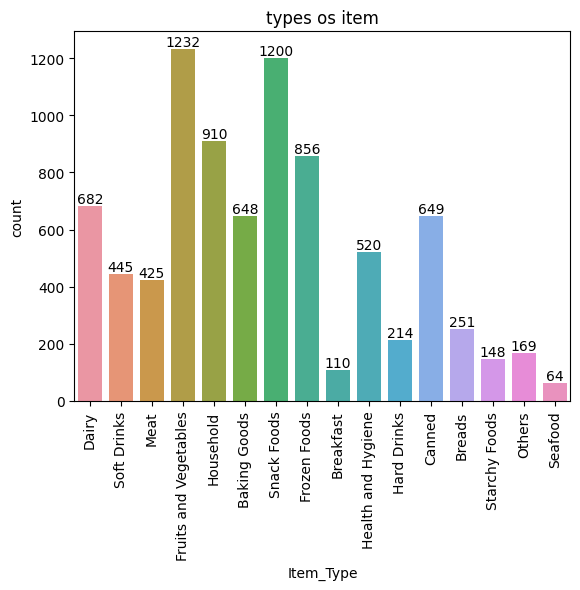

In [13]:
plt.figure.figsize=(10,10)
ax1=sns.countplot(data=df,x=df["Item_Type"])
plt.title("types os item")
ax1.bar_label(ax1.containers[0])
plt.xticks(rotation=90)
plt.show()

In [14]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [15]:
df[(df["Item_Type"]=="Snack Foods")].count().sum()

14400

In [16]:
df.sort_values(by="Item_Type",axis=0).head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4261,FDY36,12.300000,Low Fat,0.009425,Baking Goods,74.8380,OUT049,1999,Medium,Tier 1,Supermarket Type1,1537.9980
5387,FDS60,20.850000,Low Fat,0.032581,Baking Goods,180.0660,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.1920
5363,FDY48,14.000000,Low Fat,0.023783,Baking Goods,104.0332,OUT045,2002,Medium,Tier 2,Supermarket Type1,1435.4648
5362,FDZ48,17.750000,Low Fat,0.076114,Baking Goods,111.4544,OUT045,2002,Medium,Tier 2,Supermarket Type1,1006.6896
5354,FDN24,12.857645,Low Fat,0.198317,Baking Goods,54.3956,OUT019,1985,Small,Tier 1,Grocery Store,272.9780


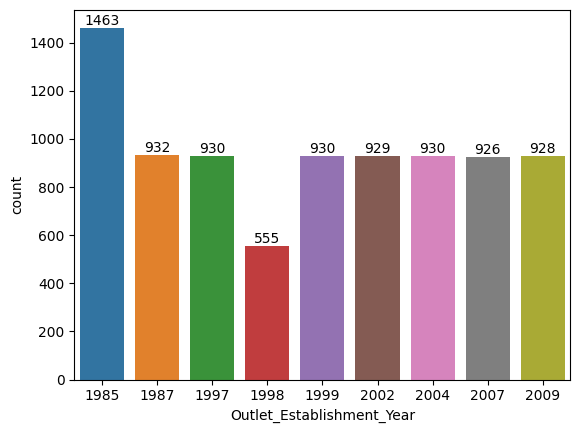

In [17]:
plt.figure.fiqsize=(19,9)
ax2=sns.countplot(data=df,x="Outlet_Establishment_Year")
ax2.bar_label(ax2.containers[0])
plt.show()

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

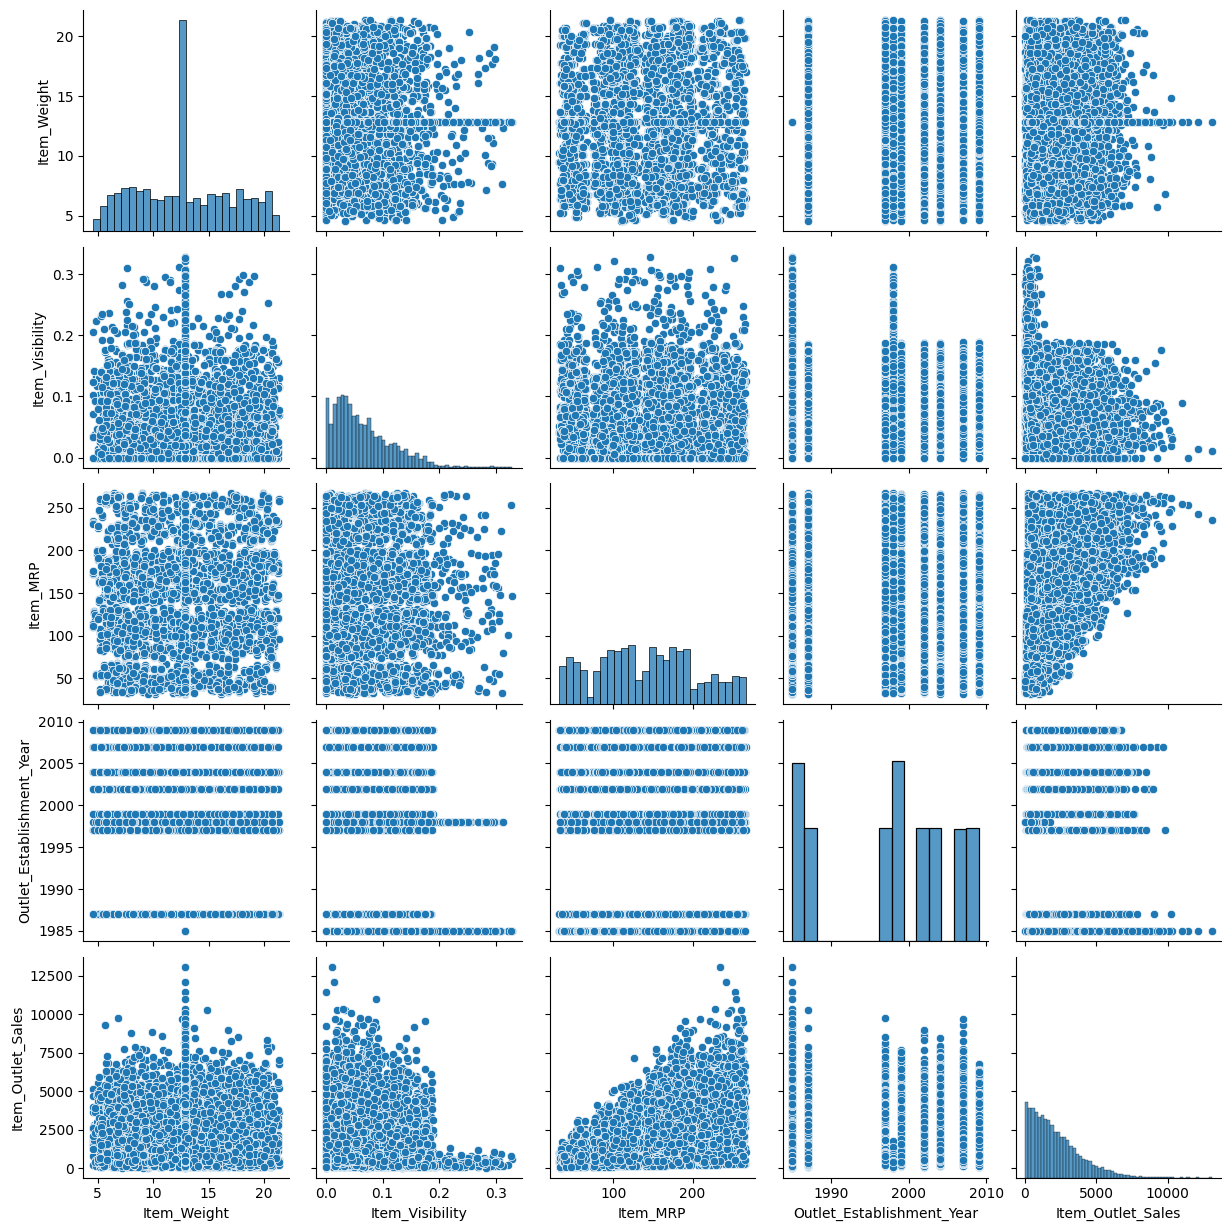

In [18]:
sns.pairplot(df)

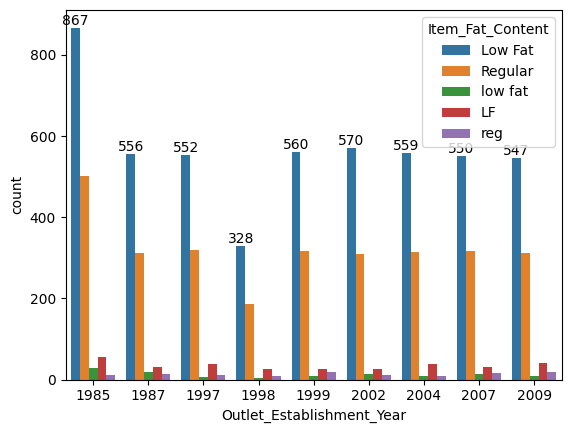

In [19]:
plt.figure.fiqsize=(19,9)
ax2=sns.countplot(data=df,x="Outlet_Establishment_Year",hue="Item_Fat_Content")
ax2.bar_label(ax2.containers[0])
plt.show()

In [20]:
df.head(0)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot: xlabel='Outlet_Establishment_Year'>

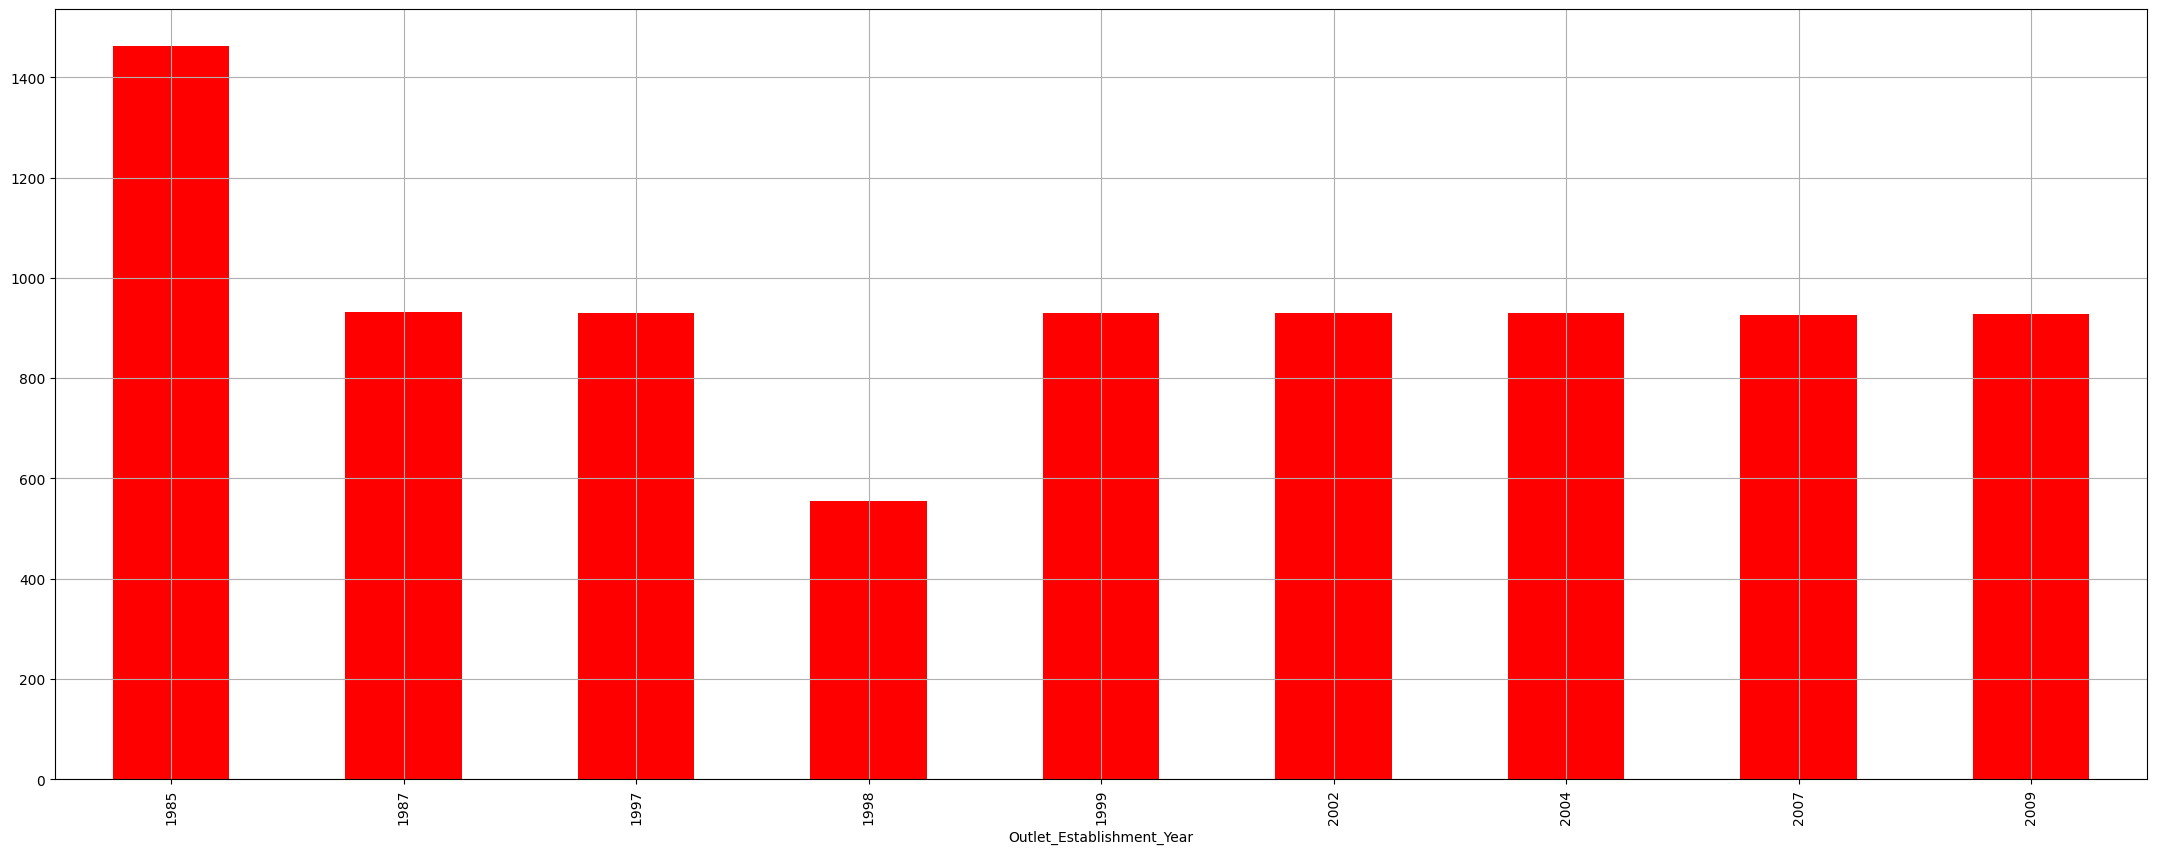

In [22]:
t=df.groupby("Outlet_Establishment_Year")["Item_Fat_Content"].count()
t.plot(kind="bar",figsize=(27,10),color="red",alpha=1,grid=True)

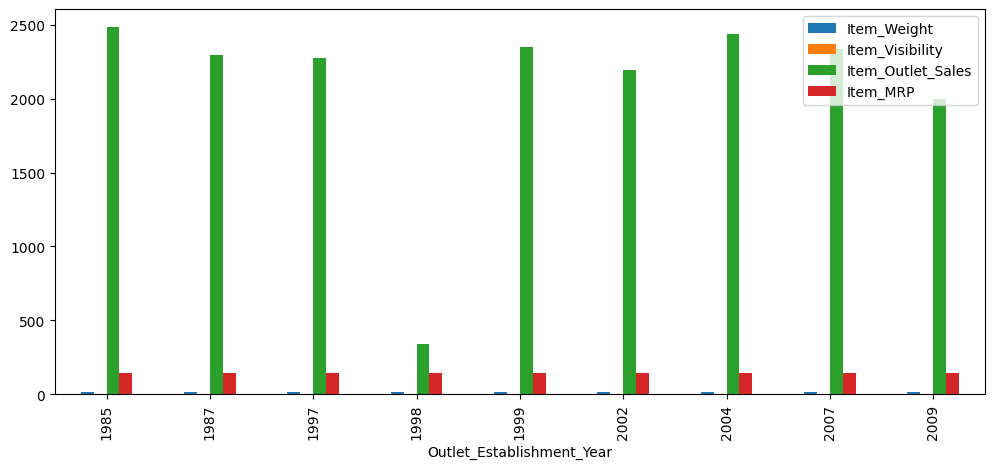

In [23]:
df.groupby("Outlet_Establishment_Year").agg({"Item_Weight":"mean","Item_Visibility":"mean"
                                             ,"Item_Outlet_Sales":"mean","Item_MRP":"mean"}).plot(
    kind="bar",figsize=(12,5)).legend(loc='upper right')

In [24]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [25]:
# from sklearn.preprocessing import OneHotEncoder

In [26]:
# on=OneHotEncoder()
# market=on.fit_transform(df[["Outlet_Type"]]).toarray()
# # 

In [27]:
# market=pd.DataFrame(market)

In [28]:
# market

In [29]:
# df=pd.concat([df,market],axis=1)

In [30]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [31]:
df=df.drop(columns=["Outlet_Type"],axis=1)

In [32]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,2097.2700


C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

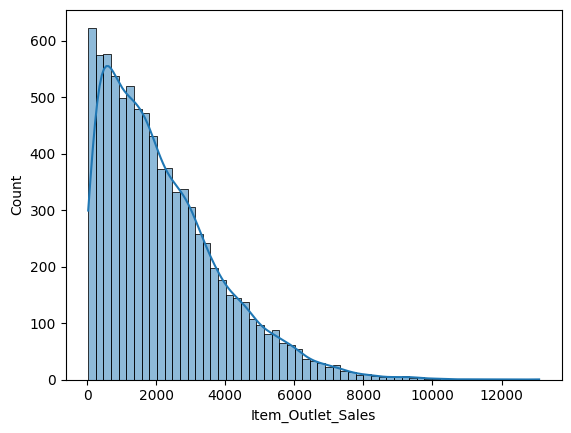

In [33]:
sns.histplot(data=df,x="Item_Outlet_Sales",kde=True)

In [34]:
# outerliet=r detection

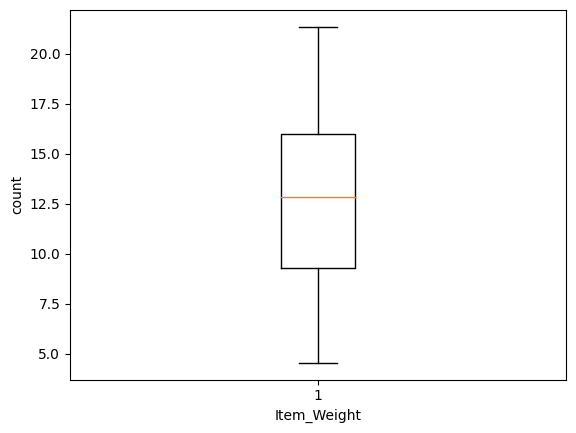

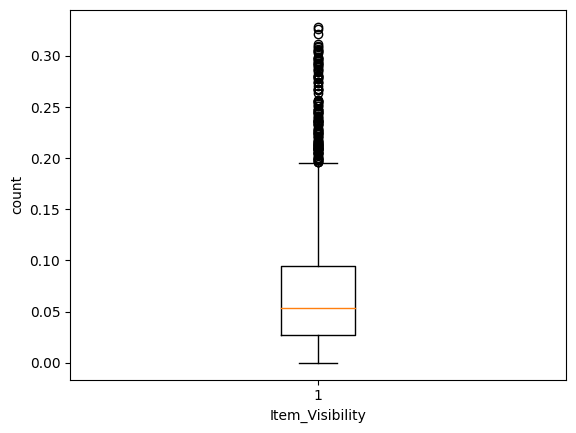

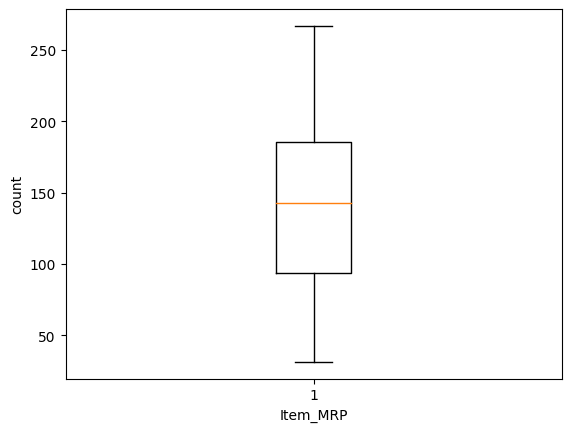

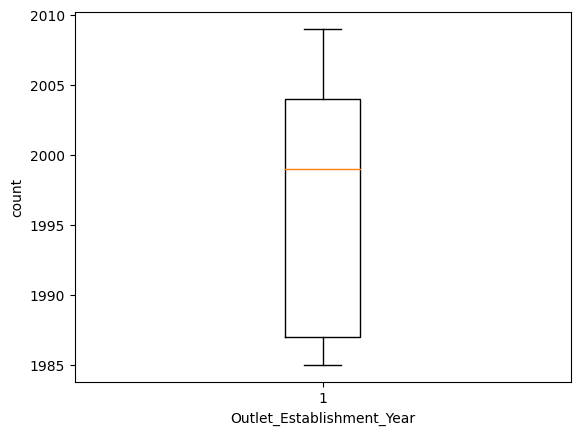

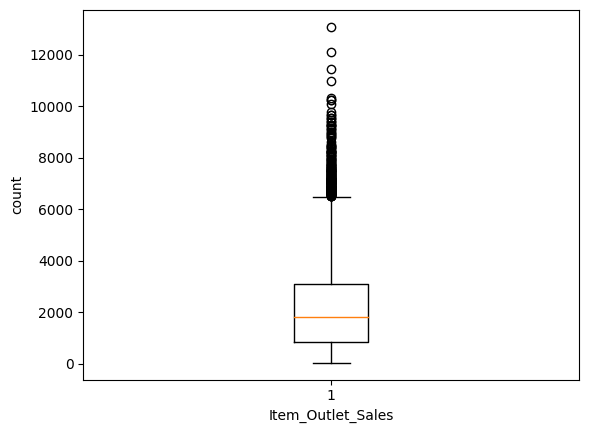

In [35]:
for cl in df.columns:
    if df[cl].dtypes!="object":
        plt.boxplot(df[cl])
        plt.xlabel(cl)
        plt.ylabel("count")
        plt.show()

In [36]:
df.head(0)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales


In [37]:
out=["Item_Outlet_Sales","Item_Visibility"]

In [38]:


for i in out:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df=df[(df[i]>=ll) & (df[i]<=ul)]

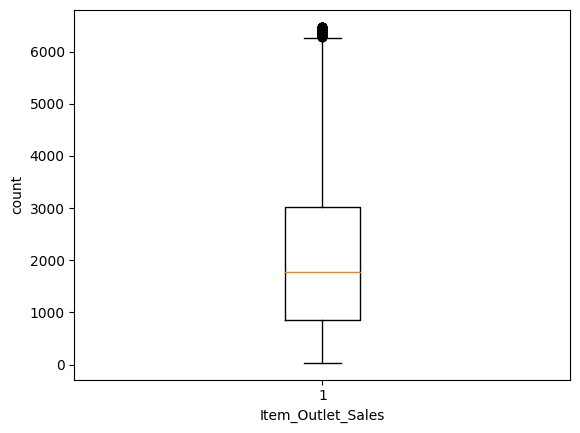

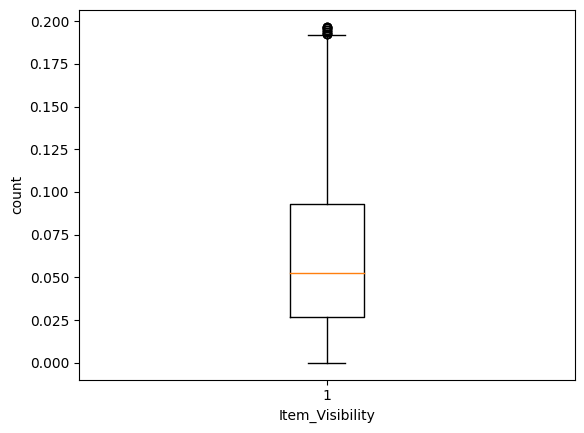

In [39]:
for cl in out:
        plt.boxplot(df[cl])
        plt.xlabel(cl)
        plt.ylabel("count")
        plt.show()

In [40]:
# sns.heatmap(df.corr(),annot=True)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

<AxesSubplot: >

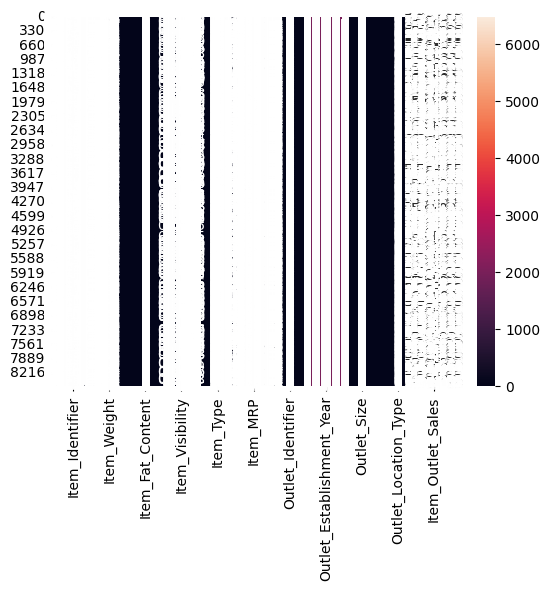

In [42]:
sns.heatmap(df,annot=True)

In [43]:
df.Outlet_Location_Type.unique()

array([0, 2, 1])

In [44]:

        plt.show()

In [45]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Item_Outlet_Sales            0
dtype: int64

In [46]:
!pip install lightgbm


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import*
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [48]:
X=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=34)

# model

In [50]:
model=[]
model.append(("lr",LinearRegression()))
model.append(("xgb",XGBRegressor()))
model.append(("lig",LGBMRegressor()))

In [51]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Item_Outlet_Sales            float64
dtype: object

In [52]:
result= []
names = []

for i ,j in model:
    cv_rs=cross_val_score(j, X_train, y_train, cv=5 ,scoring="r2")
    result.append(cv_rs)
    names.append(i)
    print(f"{i} :{cv_rs.mean()} {cv_rs.std()}")

lr :0.42854998786644777 0.009406474712983176
xgb :0.4933618055283612 0.016797047486582534
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 5900, number of used features: 10
[LightGBM] [Info] Start training from score 2115.773260
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 5901, number of used features: 10
[LightGBM] [Info] Start training from score 2093.116114
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhe

## xgb get good result 

# hyper parameter 

In [53]:
# selecting best model 

In [54]:
b_model=XGBRegressor()
par={'learning_rate': [0.1, 0.01, 0.001],"n_estimators":[500,800,50]}
g_search=GridSearchCV(b_model,par,cv=5,scoring="neg_mean_squared_error")
g_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [500, 800, 50]},
             scoring='neg_mean_squared_error')

In [55]:
print("model par",g_search.best_params_)

model par {'learning_rate': 0.01, 'n_estimators': 500}


model=XGBRegressor(learning_rate': 0.01, 'n_estimators': 500)
model.fit(X_train,y_train)
y=model.predict(X_test)

In [56]:
model=XGBRegressor(learning_rate = 0.01, n_estimators=500) 
model.fit(X_train,y_train) 
y=model.predict(X_test)

In [57]:
r=r2_score(y_test,y)
r

0.5424550626100924

In [70]:
mse=mean_squared_error(y_test,y)
rmse=np.sqrt(mse)
print(f"mse:{mse} \n rmse :{rmse}")


mse:960985.1046861586 
 rmse :980.298477345629
